In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [ ]:
dataframe = pd.read_csv("spam.csv")
print(dataframe.describe())

       Label               EmailText
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [ ]:
x = dataframe["EmailText"]
y = dataframe["Label"]

In [ ]:
x_train,y_train = x[0:4457],y[0:4457]
x_test,y_test = x[4457:],y[4457:]

In [ ]:
cv = CountVectorizer()  
features = cv.fit_transform(x_train)


tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

model = GridSearchCV(svm.SVC(), tuned_parameters)

model.fit(features,y_train)


print(model.best_params_)

print(model.score(cv.transform(x_test),y_test))

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.9874439461883409


In [ ]:
joblib.dump(model.best_estimator_, 'filename.pkl', compress = 1)

['filename.pkl']

In [ ]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ã_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: EmailText, Length: 5572, dtype: object


In [ ]:
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object


In [ ]:
y.count()

5572

In [ ]:
y.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
dataframe['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

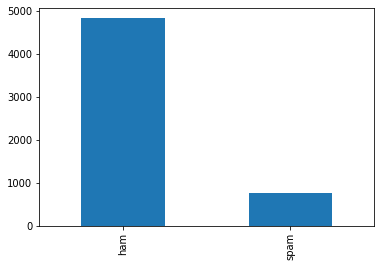

In [ ]:
dataframe['Label'].value_counts().plot(kind='bar')

In [ ]:
loaded_model = joblib.load('/content/filename.pkl')
a = input('Enter the text:- ')
result = model.predict(cv.transform([a]))
print(result[0])

Enter the text:- Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or ÃƒÂ¥Ã‚Â£1000. To claim txt DIS to 87121 18+6*ÃƒÂ¥Ã‚Â£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ
spam
